In [450]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.datasets import make_hastie_10_2
from category_encoders import *
# import category_encoders as ce
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
# from category_encoders import MEstimateEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# preference bi_ex0418_3.py
# reading training and testing data
df = pd.read_csv('DATA (1).csv')
df.head()


,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [451]:
df['21']=df['21'].map({1:1,2:-1,3:0})
df['22']=df['22'].map({1:1,2:0})
df['28']=df['28'].map({1:-1,2:1,3:0})
# df['23']=df['23'].map({1:1,2:-1,3:0})
# 23.24可或不可
# df['24']=df['24'].map({1:1,2:2,3:0})
# 28 有時有用

In [452]:
y=df['GRADE']
y.head()
# df['28'].unique()

0    1
1    1
2    1
3    1
4    1
Name: GRADE, dtype: int64

In [453]:
col=['1','4','5','6','7','8','9','10',
    '11','12','14','15','16','17','18','19','20',
    '21','22','23','24','25','26','27','28','29','30']
X=df[col]
# 去掉2,3,13
X.head()
# X.shape()

,1,4,5,6,7,8,9,10,11,12,...,21,22,23,24,25,26,27,28,29,30
0,2,3,1,2,2,1,1,1,1,2,...,1,1,1,1,3,2,1,1,1,1
1,2,3,1,2,2,1,1,1,2,3,...,1,1,1,1,3,2,3,1,2,3
2,2,3,2,2,2,2,4,2,2,2,...,1,1,1,1,2,2,1,-1,2,2
3,1,3,1,2,1,2,1,2,1,2,...,1,1,1,2,3,2,2,-1,3,2
4,2,3,2,2,1,3,1,4,3,3,...,1,1,2,1,2,2,2,-1,2,2


<Axes: >

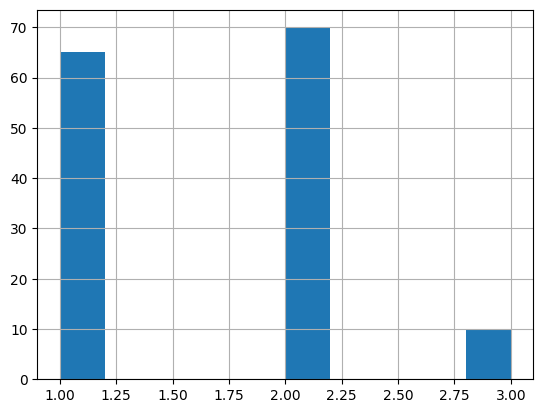

In [454]:
z=df['1']
z.hist()

In [455]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>],
       [<Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>,
        <Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>],
       [<Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>,
        <Axes: title={'center': '21'}>, <Axes: title={'center': '22'}>,
        <Axes: title={'center': '23'}>],
       [<Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
        <Axes: title={'center': '26'}>, <Axes: title={'center': '27'}>,
        <Axes: title={'center': '28'}>],
       [<Axes: title={'center': '29'}>, <Axes: title={'center': '30'}>,
        <A

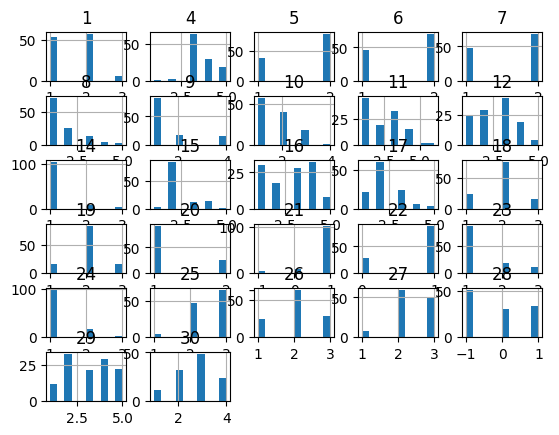

In [456]:
xtrain.hist()

In [457]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)


(116, 27)
(29, 27)
(116,)


In [458]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)

knn_tr_acc = knn.score(xtrain, ytrain)
knn_te_acc = knn.score(xtest, ytest)
print('1-NN training acc:',knn_tr_acc)
print('1-NN testing acc:',knn_te_acc)


1-NN training acc: 0.43103448275862066
1-NN testing acc: 0.3448275862068966


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

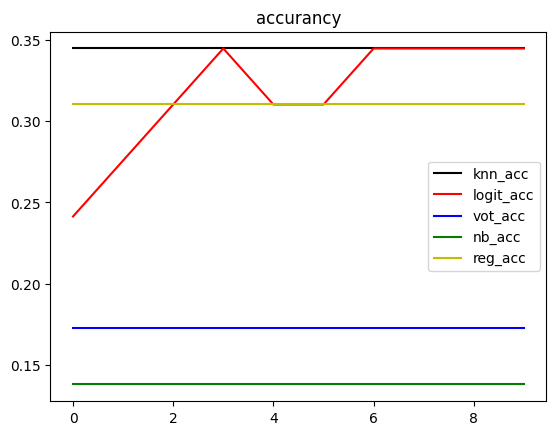

In [459]:
plt.title('accurancy')
class_weight=[]
yhat = knn.predict(xtest)
knn_acc = []
logit_acc=[]
vot_acc=[]
nb_acc=[]
reg_acc=[]
# knn_prec = []
# knn_recall = []
# knn_f1 = []

for i in range(10):
    class_weight.append(i)
    knn_acc.append(accuracy_score(ytest,yhat))
    # knn_prec.append(precision_score(ytest,yhat))
    # knn_recall.append(recall_score(ytest,yhat))
    # knn_f1.append(f1_score(ytest,yhat))
for weight in range(1,11):
    logit = LogisticRegression(C=1,class_weight={0:1,1:weight})
    logit.fit(xtrain,ytrain)
    yhat = logit.predict(xtest)
    logit_acc.append(accuracy_score(ytest,yhat))
for weight in range(1,11):
    clf1 = LogisticRegression(multi_class='multinomial', random_state=1,max_iter=50)
    clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
    clf3 = GaussianNB()
    eclf1 = VotingClassifier(estimators=[
            ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
    eclf1 = eclf1.fit(xtrain, ytrain)
    yhat = eclf1.predict(xtest)
    vot_acc.append(accuracy_score(ytest,yhat))
for weight in range(1,11):
    nb = GaussianNB()
    nb.fit(xtrain,ytrain)
    yhat = nb.predict(xtest)
    nb_acc.append(accuracy_score(ytest,yhat))
for weight in range(1,11):
    reg =GradientBoostingClassifier(n_estimators=100, learning_rate=5.0,
         max_depth=1, random_state=0)
    reg.fit(xtrain,ytrain)
    yhat = reg.predict(xtest)
    reg_acc.append(accuracy_score(ytest,yhat))
   
    

plt.plot(class_weight,knn_acc,'k-',label='knn_acc')
plt.plot(class_weight,logit_acc,'r-',label='logit_acc')
plt.plot(class_weight,vot_acc,'b-',label='vot_acc')
plt.plot(class_weight,nb_acc,'g-',label='nb_acc')
plt.plot(class_weight,reg_acc,'y-',label='reg_acc')

plt.legend()
plt.show()